# Data Cube Cloud Statistics

This notebook explores Landsat-7 and Landsat-8 Data Cubes and reports cloud statistics for selected regions within a cube. This is valuable information for performing analysis. For example, if there are extensive clouds for a season it may significantly impact the mosaic product or index values. Another example is that a user may want to use a single date when there are no clouds to assess land features.

In [1]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

# Add path
from sys import path
path.append("../")

In [2]:
# Load Data Cube Configuration
import datacube
dc = datacube.Datacube(app = 'cloud_analysis', config = '/home/ksaadmin/.datacube.conf')

# Import Data Cube API
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi(config = '/home/ksaadmin/.datacube.conf')

# Get available products
products_info = dc.list_products()

In [3]:
print(products_info)

                                        name  \
name                                           
landsat_sr_kenya            landsat_sr_kenya   
ls8_usgs_level1_scene  ls8_usgs_level1_scene   
s2_l2a                                s2_l2a   
usgs_ls7e_level1_1        usgs_ls7e_level1_1   
usgs_ls8e_level1_1        usgs_ls8e_level1_1   

                                                             description  \
name                                                                       
landsat_sr_kenya       USGS Landsat 8 Collection 2 Level-2 Surface Re...   
ls8_usgs_level1_scene       Landsat 8 USGS Level 1 Collection-1 OLI-TIRS   
s2_l2a                 Sentinel-2a and Sentinel-2b imagery, processed...   
usgs_ls7e_level1_1     United States Geological Survey Landsat 7 Enha...   
usgs_ls8e_level1_1          Landsat 8 USGS Level 1 Collection-1 OLI-TIRS   

                         license default_crs default_resolution  
name                                                            

In [4]:
# Select a Product and a Platform from the tables above
product = "usgs_ls7e_level1_1"
platform = "LANDSAT_7"
data_full = dc.load(product=product,output_crs ='EPSG:4326', resolution=(-0.00027,0.00027))

In [5]:
#obtain latitude extends
latitude_extents = data_full.latitude.values
size = latitude_extents.size-1
latitude_extents = (latitude_extents[0],latitude_extents[size])

#obtain longitude extends
longitude_extents = data_full.longitude.values
size = longitude_extents.size-1
longitude_extents = (longitude_extents[0],longitude_extents[size])
#print 
print(latitude_extents)
print(longitude_extents)

(-3.3835050000000004, -5.2929450000000005)
(38.470815, 40.611915)


In [6]:
# Select an analysis region (Lat-Lon) within the extents listed above. 
longitude_extents = (39.0, 40.0)
latitude_extents = (-4.0, -5) 
# Time Period
time_extents = ('2000', '2022')

In [7]:
# Filter the image
query = {
    'time' : time_extents,
    'latitude' : latitude_extents,
    'longitude' : longitude_extents,
}

#load dataset
data_partial = dc.load(product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'quality'],
                          output_crs='EPSG:4326', resolution=(-0.00027,0.00027),
                          **query
                         )
data_partial

<xarray.Dataset>
Dimensions:      (time: 4, latitude: 3705, longitude: 3705)
Coordinates:
  * time         (time) datetime64[ns] 2000-12-07T07:21:56.518157 ... 2006-02...
  * latitude     (latitude) float64 -4.0 -4.0 -4.0 -4.001 ... -4.999 -5.0 -5.0
  * longitude    (longitude) float64 39.0 39.0 39.0 39.0 ... 40.0 40.0 40.0 40.0
    spatial_ref  int32 4326
Data variables:
    red          (time, latitude, longitude) uint16 78 65 65 65 ... 33 37 34 37
    green        (time, latitude, longitude) uint16 92 76 77 79 ... 45 44 44 46
    blue         (time, latitude, longitude) uint16 104 90 87 85 ... 80 78 82 81
    nir          (time, latitude, longitude) uint16 104 102 99 108 ... 14 15 15
    swir1        (time, latitude, longitude) uint16 128 120 128 127 ... 17 17 18
    swir2        (time, latitude, longitude) uint16 72 64 68 66 ... 13 16 16 16
    quality      (time, latitude, longitude) uint16 672 672 672 ... 672 672 672
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

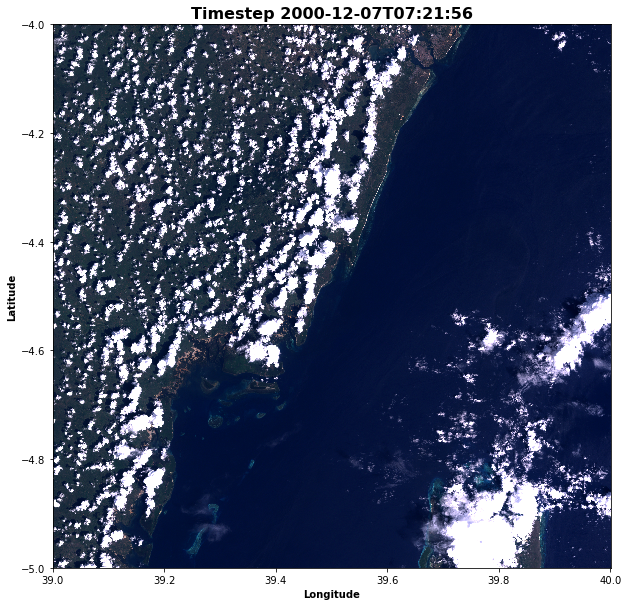

In [8]:
import matplotlib.pyplot as plt
from utils.dea_tools.plotting import display_map, rgb

# Set the time step to view
time_step = 0

# Set the band combination to plot
bands = ["red", "green", "blue"]

# Generate the image by running the rgb function
rgb(data_partial, bands=bands, index=time_step, size=10)

# Format the time stamp for use as the plot title
time_string = str(data_partial.time.isel(time=time_step).values).split('.')[0]  

# Set the title and axis labels
ax = plt.gca()
ax.set_title(f"Timestep {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')

# Display the plot
plt.show()

# Cloud Coverage 

In [9]:
data_partial.quality.attrs["flags_definition"]

{'cloud': {'bits': [4],
  'values': {'0': False, '1': True},
  'description': 'Cloud'},
 'dropped_pixel': {'bits': [1],
  'values': {'0': False, '1': True},
  'description': 'Dropped Pixel'},
 'snow_ice_conf': {'bits': [9, 10],
  'values': {'0': 'Not Determined', '1': 'Low', '2': 'Medium', '3': 'High'},
  'description': 'Snow/Ice Confidence with low =(0-33)%, medium =(34-66)% and high =(67-100)%'},
 'designated_fill': {'bits': [0],
  'values': {'0': False, '1': True},
  'description': 'Used to identify fill values'},
 'cloud_confidence': {'bits': [5, 6],
  'values': {'0': 'Not Determined', '1': 'Low', '2': 'Medium', '3': 'High'},
  'description': 'Cloud Confidence with low =(0-33)%, medium =(34-66)% and high =(67-100)%'},
 'cloud_shadow_conf': {'bits': [7, 8],
  'values': {'0': 'Not Determined', '1': 'Low', '2': 'Medium', '3': 'High'},
  'description': 'Cloud Shadow Confidence with low =(0-33)%, medium =(34-66)% and high =(67-100)%'},
 'radiometric_saturation': {'bits': [2, 3],
  'valu

(array([ 4177683.,        0.,        0.,        0.,        0.,        0.,
        40001689.,  6325376.,        0.,  4403352.]),
 array([  1. ,  97.7, 194.4, 291.1, 387.8, 484.5, 581.2, 677.9, 774.6,
        871.3, 968. ]),
 <BarContainer object of 10 artists>)

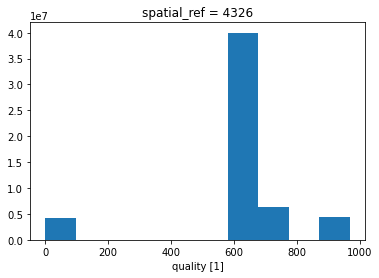

In [10]:
data_partial.quality.plot()

/home/ksaadmin/miniconda3/envs/cubeenv/lib/python3.9/site-packages/datacube/storage/masking.py:7: DeprecationWarning: datacube.storage.masking has moved to datacube.utils.masking
  warnings.warn("datacube.storage.masking has moved to datacube.utils.masking",


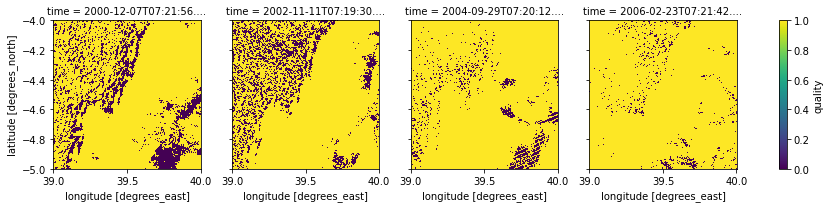

In [11]:
from datacube.storage.masking import make_mask
from datacube.storage.masking import mask_invalid_data

# Create the mask based on cloud is False -- you can see the flags above
clear_mask = make_mask(data_partial.quality, cloud=False)
clear_mask.plot(col="time", col_wrap=4)
# clear_mask.plot()

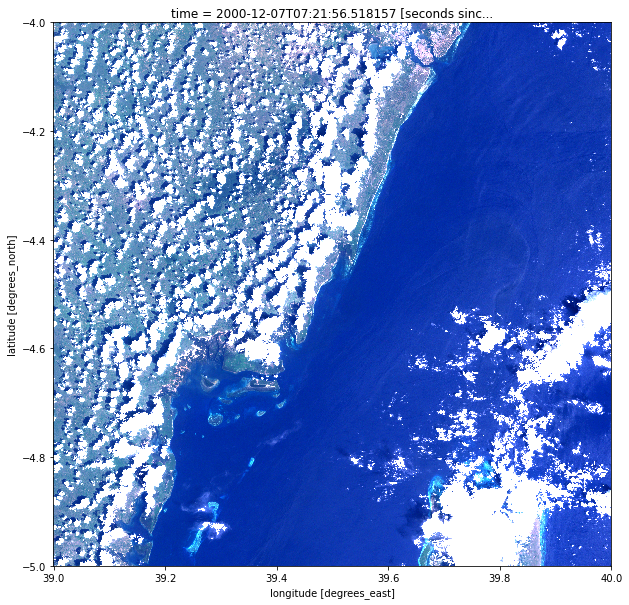

In [12]:
# Apply the mask
clear = data_partial.where(clear_mask)

#plot the clear layer
# Set the time step to view
time_step = 0

# Set the band combination to plot
bands = ["red", "green", "blue"]

# Generate the image by running the rgb function
rgb(clear, bands=bands, index=time_step, size=10)

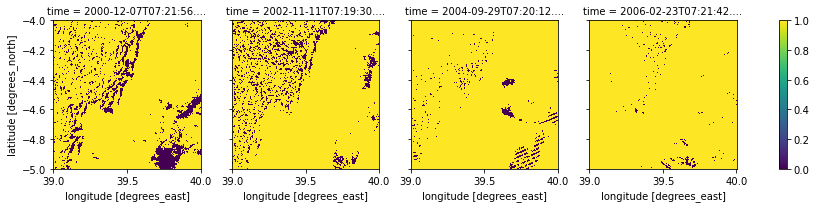

In [13]:
from odc.algo import mask_cleanup
# Dilate all cloud and cloud shadow pixels by 5 pixels in all directions
cloud_shadow_buffered = mask_cleanup(mask=clear_mask,
                                     mask_filters=[("opening", 3), ("dilation", 5)])
cloud_shadow_buffered.plot(col="time", col_wrap=4)

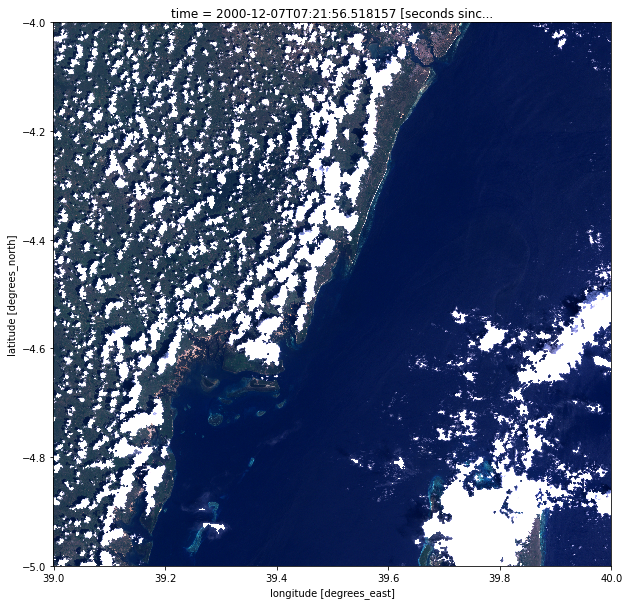

In [14]:
# Apply the mask
buffered_cloud_free = data_partial.where(cloud_shadow_buffered)

# Set the time step to view
time_step = 0

# Set the band combination to plot
bands = ["red", "green", "blue"]

# Generate the image by running the rgb function
rgb(buffered_cloud_free, bands=bands, index=time_step, size=10)

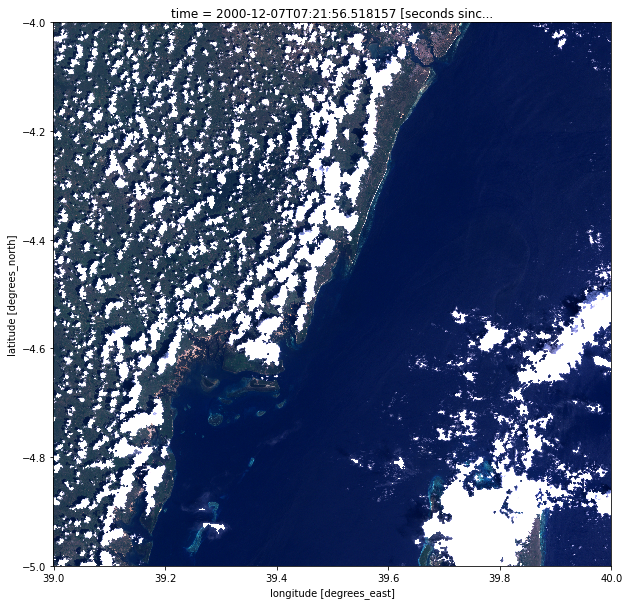

In [15]:
# Set invalid nodata pixels to NaN
valid_data = mask_invalid_data(buffered_cloud_free)
# Set the time step to view
time_step = 0

# Set the band combination to plot
bands = ["red", "green", "blue"]

# Generate the image by running the rgb function
rgb(valid_data, bands=bands, index=time_step, size=10)

# Export to GeoTIFF

In [16]:
import xarray as xr  
import numpy as np
#define methods
import time
def time_to_string(t):
    return time.strftime("%Y_%m_%d_%H_%M_%S", time.gmtime(t.astype(int)/1000000000))
# define methods
from utils.data_cube_utilities import dc_utilities
def export_slice_to_geotiff(ds, path):
    dc_utilities.write_geotiff_from_xr(path,
                                        ds.astype(np.float32),
                                        list(ds.data_vars.keys()),
                                        crs="EPSG:4326")
def export_xarray_to_geotiff(ds, path):
    for t in ds.time:
        time_slice_xarray = ds.sel(time = t)
        export_slice_to_geotiff(time_slice_xarray,
                                path + "_" + time_to_string(t) + ".tif")

### Start export

In [17]:
export_xarray_to_geotiff(valid_data, "/home/ksaadmin/DataPortal/ksadata/geoserver_data/data/Images/CloudMask/landsat7")